## Problem Set 3

### Question 1

Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials. 
            
Occupations

In [3]:
#Step 1. Import the necessary libraries
import pandas as pd

#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called users
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

In [4]:
#Step 4. Discover what is the mean age per occupation
users.groupby('occupation').mean()

,user_id,age
occupation,,
administrator,430.949367,38.746835
artist,451.892857,31.392857
doctor,533.714286,43.571429
educator,466.905263,42.010526
engineer,456.328358,36.388060
entertainment,398.000000,29.222222
executive,422.312500,38.718750
healthcare,501.437500,41.562500
homemaker,443.000000,32.571429


In [7]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least
users['is_male'] = users.gender.apply(lambda x: True if x == 'M' else False)
users.is_male

0       True
1      False
2       True
3       True
4      False
       ...  
938    False
939     True
940     True
941    False
942     True
Name: is_male, Length: 943, dtype: bool

In [8]:
(users.groupby('occupation').is_male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [9]:
#Step 6. For each occupation, calculate the minimum and maximum ages
users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [10]:
#Step 7. For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [11]:
#Step 8. For each occupation present the percentage of women and men

individual_occupation_gender_count = users.groupby(['occupation']).agg('count')
individual_occupation_gender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'}).div(individual_occupation_gender_count) * 100
individual_occupation_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

### Question 2

Euro Teams

In [13]:
#Step 1. Import the necessary libraries
import pandas as pd

#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

#Step 4. Select only the Goal column
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [14]:
#Step 5. How many team participated in the Euro2012?
euro12['Team'].count()

16

In [15]:
#Step 6. What is the number of columns in the dataset?
len(euro12.columns)

35

In [16]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [17]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by = ['Red Cards','Yellow Cards'], ascending=True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [18]:
#Step 9. Calculate the mean Yellow Cards given per Team
discipline['Yellow Cards'].mean()

7.4375

In [19]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6][['Team', 'Goals']]

,Team,Goals
5,Germany,10
13,Spain,12


In [20]:
#Step 11. Select the teams that start with G
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [21]:
#Step 12. Select the first 7 columns
euro12.iloc[0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [22]:
#Step 13. Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [23]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3

Housing

In [24]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import random

In [25]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000

firstHousingRandomSeries = pd.Series(np.random.randint(1,5,100))
firstHousingRandomSeries

0     3
1     2
2     2
3     4
4     2
     ..
95    1
96    2
97    1
98    1
99    4
Length: 100, dtype: int32

In [26]:
secondHousingRandomSeries = pd.Series(np.random.randint(1, 4, 100))
secondHousingRandomSeries

0     1
1     3
2     2
3     3
4     3
     ..
95    1
96    1
97    1
98    1
99    2
Length: 100, dtype: int32

In [27]:
thirdHousingRandomSeries = pd.Series(np.random.randint(10000, 30001, 100))
thirdHousingRandomSeries

0     27282
1     28297
2     28446
3     21590
4     29215
      ...  
95    27375
96    24148
97    27086
98    22044
99    29274
Length: 100, dtype: int32

In [28]:
#Step 3. Create a DataFrame by joinning the Series by column
randomHousingJoinSeries = pd.concat([firstHousingRandomSeries, secondHousingRandomSeries, thirdHousingRandomSeries], axis=1)
randomHousingJoinSeries

,0,1,2
0,3,1,27282
1,2,3,28297
2,2,2,28446
3,4,3,21590
4,2,3,29215
...,...,...,...
95,1,1,27375
96,2,1,24148
97,1,1,27086
98,1,1,22044


In [29]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
randomHousingJoinSeries.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
randomHousingJoinSeries

,bedrs,bathrs,price_sqr_meter
0,3,1,27282
1,2,3,28297
2,2,2,28446
3,4,3,21590
4,2,3,29215
...,...,...,...
95,1,1,27375
96,2,1,24148
97,1,1,27086
98,1,1,22044


In [30]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([firstHousingRandomSeries, secondHousingRandomSeries, thirdHousingRandomSeries], axis=0)
bigcolumn

0         3
1         2
2         2
3         4
4         2
      ...  
95    27375
96    24148
97    27086
98    22044
99    29274
Length: 300, dtype: int32

In [31]:
#Step 6. Ops it seems it is going only until index 99. Is it true?
len(bigcolumn)

300

Ans: Length is showing as 300, so it can be concluded that index is maintained not until 99.

In [32]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          3
1          2
2          2
3          4
4          2
       ...  
295    27375
296    24148
297    27086
298    22044
299    29274
Length: 300, dtype: int32

### Question 4

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

In [33]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [35]:
#Step 2. Import the dataset from the attached file wind.txt
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

data = pd.read_csv('wind.txt', sep = "\s+", parse_dates = [[0,1,2]])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [36]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
import datetime

def dateCorrection(date):
    if date.year > 1989:
        y = date.year - 100
    else:
        y = date.year
    return datetime.date(y, date.month, date.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(dateCorrection)
data


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [37]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data["Yr_Mo_Dy"]

0      1961-01-01
1      1961-01-02
2      1961-01-03
3      1961-01-04
4      1961-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Yr_Mo_Dy, Length: 6574, dtype: datetime64[ns]

In [38]:
data = data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [39]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [40]:
data.shape

(6574, 12)

In [41]:
new_data= data.dropna()
new_data.shape

(6546, 12)

In [42]:
#Step 7. Compute how many non-missing values there are in total.
data.notnull().sum().sum()

78857

In [44]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

meanWindspeedsLocation = pd.DataFrame(data)
meanWindspeedsLocation.mean()

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [45]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.

loc_stats = data.describe(percentiles=[])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [46]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis = 1)
day_stats['max'] = data.max(axis = 1) 
day_stats['mean'] = data.mean(axis = 1) 
day_stats['std'] = data.std(axis = 1)

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [47]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

new_data.loc[new_data.index.month == 1].mean()

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [48]:
#Step 12. Downsample the record to a yearly frequency for each location.
new_data.groupby(new_data.index.to_period('A')).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [49]:
#Step 13. Downsample the record to a monthly frequency for each location.

new_data.groupby(new_data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [50]:
#Step 14. Downsample the record to a weekly frequency for each location.

new_data.groupby(new_data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-02/1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-23/1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-01-30/1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [51]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

new_data.index.day


Int64Index([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Yr_Mo_Dy', length=6546)

In [52]:
startyear = new_data[new_data.index.year == 1961]
week_stats = new_data.resample('W').mean()
week_stats.describe(percentiles=[])


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,12.356298,10.635444,11.652878,6.299636,10.449166,7.086745,9.792288,8.486521,8.490357,8.699941,13.110130,15.593725
std,3.464961,3.371183,2.844036,2.182339,3.142446,2.552300,3.310785,2.851360,2.636005,2.918842,3.746798,4.472537
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
50%,12.272857,10.468571,11.485714,6.132857,10.260000,6.932857,9.571429,8.330000,8.390000,8.482857,12.831429,15.340000
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286


### Question 5

In [53]:
#Step 1. Import the necessary libraries
import pandas as pd

In [70]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [55]:
#Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [56]:
#Step 5. What is the number of observations in the dataset?
chipo.shape

(4622, 5)

In [57]:
#Step 6. What is the number of columns in the dataset?
len(chipo.columns)

5

In [58]:
#Step 7. Print the name of all the columns.
for chipoColumnName in chipo.columns: 
    print(chipoColumnName)

order_id
quantity
item_name
choice_description
item_price


In [59]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [60]:
#Step 9. Which was the most-ordered item?
chipoMostOrderedItemData = chipo.groupby("item_name").sum().sort_values('quantity',ascending=False).head(1)
chipoMostOrderedItemData

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [61]:
#Step 10. For the most-ordered item, how many items were ordered?

#From the above Step 9, it can be observed that the most-ordered item is 'Chicken Bowl'
chipo[chipo['item_name'] == 'Chicken Bowl']['quantity'].sum()

761

In [62]:
#Step 11. What was the most ordered item in the choice_description column?
chipoMostOrderedChoiceDescriptionField = chipo.groupby("choice_description").sum().sort_values('quantity',ascending=False).head(1)
chipoMostOrderedChoiceDescriptionField

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [63]:
#Step 12. How many items were orderd in total?
chipo['quantity'].sum()

4972

In [71]:
#Step 13
#• Turn the item price into a float
chipo.item_price.str.slice(1).astype(float).head()


0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [67]:
#• Check the item price type
print(chipo['item_price'].dtype)


float64


In [72]:
#• Create a lambda function and change the type of item price
lam = lambda x : float(x[1:])
chipo.item_price.apply(lam)[:5]


0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [73]:
#• Check the item price type
chipo['item_price']=chipo.item_price.apply(lam)
print(chipo['item_price'].dtype)

float64


In [74]:
#Step 14. How much was the revenue for the period in the dataset?
chipo['item_price'].sum()


34500.16

In [76]:
#Step 15. How many orders were made in the period?
chipoOrdersBeingMade = chipo['order_id'].value_counts().count()
chipoOrdersBeingMade

1834

In [77]:
#Step 16. What is the average revenue amount per order?
chipo['item_price'].sum() / chipo.shape[0]

7.464335785374297

In [78]:
chipo['item_price'].mean()


7.464335785374397

In [79]:
#Step 17. How many different items are sold?
chipo.item_name.nunique()


50

### Question 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


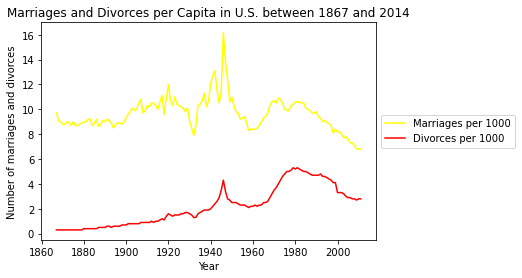

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

us_marriage_divorce_set_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

marraigeDivorce_line_label = sns.lineplot(data=us_marriage_divorce_set_data, x="Year", y ='Marriages_per_1000',label = 'Marriages per 1000', color='yellow')
year_line_label = sns.lineplot(data=us_marriage_divorce_set_data, x="Year", y ='Divorces_per_1000',label = 'Divorces per 1000', color='red')

plt.xlabel('Year')
plt.ylabel('Number of marriages and divorces')
plt.title("Marriages and Divorces per Capita in U.S. between 1867 and 2014")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0.5, 1.0, 'No. of Marriages and Divorces per Capita in U.S. between 1900, 1950, and 2000')

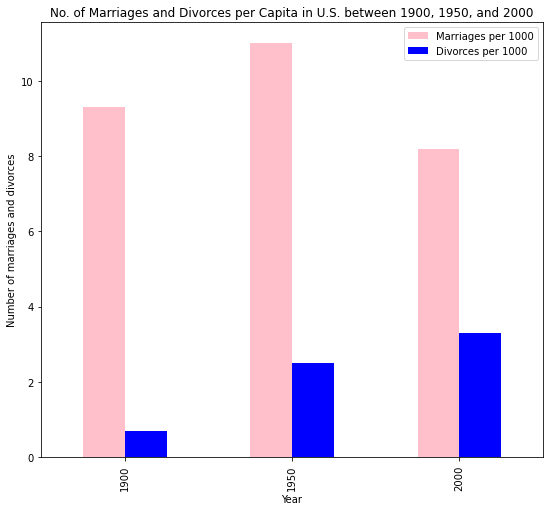

In [81]:
us_marriage_divorce_set_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

givenYearSet = us_marriage_divorce_set_data[(us_marriage_divorce_set_data['Year'] == 1950) | (us_marriage_divorce_set_data['Year']==1900) | (us_marriage_divorce_set_data['Year'] == 2000)]
givenYearSet.plot(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], kind="bar",figsize=(9,8), label= ["Marriages per 1000", "Divorces per 1000"], color=["pink","blue"])

plt.xlabel('Year')
plt.ylabel('Number of marriages and divorces')
plt.title("No. of Marriages and Divorces per Capita in U.S. between 1900, 1950, and 2000")

### Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


Text(0.5, 1.0, 'Deadliest Hollywood Actor and their kill count')

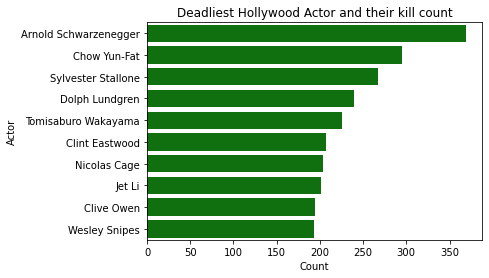

In [82]:
actorKillCounts = pd.read_csv('actor_kill_counts.csv')

sns.barplot(x="Count", y="Actor", data=actorKillCounts.sort_values("Count", ascending=False), color="green")
plt.title('Deadliest Hollywood Actor and their kill count')

### Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

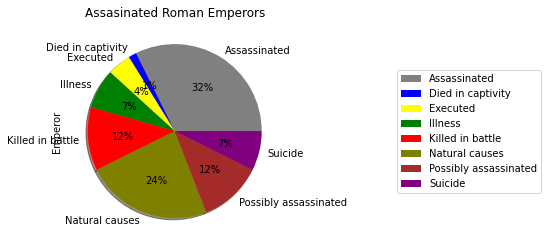

In [83]:

assassinatedRomanEmperorsSet = pd.read_csv('roman-emperor-reigns.csv')

colorList = ['grey', 'blue', 'yellow', 'green', 'red', 'olive', 'brown', 'purple', 'black', 'orange']
assassinatedRomanEmperorsSet.groupby(['Cause_of_Death']).count().plot(kind='pie', y='Emperor', autopct = '%1.0f%%', title = 'Assasinated Roman Emperors', colors=colorList, shadow=True,)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()


### Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science 
PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year

Text(0.5, 1.0, 'Relationship between the total revenue and the number of Computer Science PhDs awarded in the U.S.')

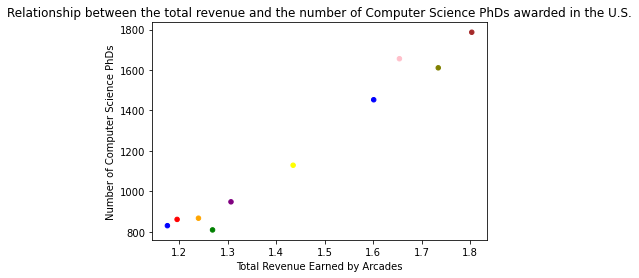

In [84]:

arcadeRevenueDoctoratesSet = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
colorList = ['red','blue','green','orange','purple','yellow','blue','pink','brown','olive']
arcadeRevenueDoctoratesSet.plot.scatter(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', c=colorList)

plt.xlabel('Total Revenue Earned by Arcades')
plt.ylabel('Number of Computer Science PhDs')
plt.title('Relationship between the total revenue and the number of Computer Science PhDs awarded in the U.S.')

### References
--> lecture notebooks from blackboard Weekly Learning Section 

--> https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/


--> https://www.askpython.com/python/built-in-methods/python-iloc-function


--> https://medium.com/data-science-365/pandas-for-data-science-part-2-c12c3ee876c2

--> https://www.freecodecamp.org/news/exploratory-data-analysis-with-numpy-pandas-matplotlib-seaborn/